# KNN: Mon salaire me permet-il d'acheter une maison à mon âge?  

Pour savoir si votre situation financière et pouvoir d'achat vous permettent d'acheter un bien immobilier en fonction de l'age et du salaire annuel.



## Chargement des bibliothèques 

In [1]:
#traitement des données 
import numpy as np 
import pandas as pd

#Tracer les graphes
import seaborn as sns
import matplotlib.pyplot as plt

#standardisation et normalisation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Charger les données 

In [2]:
data = pd.read_csv('Data/KNN_Data.csv')
data.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Exploration et analyse des données 

En prmier lieu, on voit de quoi se compose notre dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        330 non-null    int64
 1   Salary     330 non-null    int64
 2   Purchased  330 non-null    int64
dtypes: int64(3)
memory usage: 7.9 KB


De la problématique on sait que la cible qu'on veut atteindre est de savoir si oui ou non nous pouvons acheter la maison avecnos moyens alors on 

In [4]:
y = data['Purchased']
x = data.drop('Purchased', axis=1)

Voici la visualisation de notre dataset

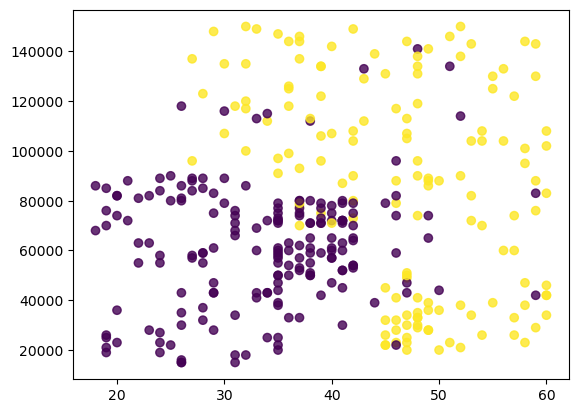

In [5]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, alpha=0.8, cmap='viridis')

Pas besoin de nettoyer les données, il n'y a pas de nan 

In [6]:
print(data['Purchased'].unique())

[0 1]


On passe maintenat aux statistiques descriptives

In [7]:
data.describe()

,Age,Salary,Purchased
count,330.000000,330.000000,330.000000
mean,39.293939,72409.090909,0.433333
std,10.447508,35208.703535,0.496288
min,18.000000,15000.000000,0.000000
25%,32.000000,43250.000000,0.000000
50%,39.000000,71000.000000,0.000000
75%,47.000000,90000.000000,1.000000
max,60.000000,150000.000000,1.000000


De ce tableau, on remarque qu'il y a un grand equart entre les variables et qu'il faut normaliser et standardiser les colonnes de ce dataset.

On peut visualiser les violin plots pour voir s'il n'y apas d'outliers ainsi que la distribution des données par rapport à notre target "maison achetée ou pas" 

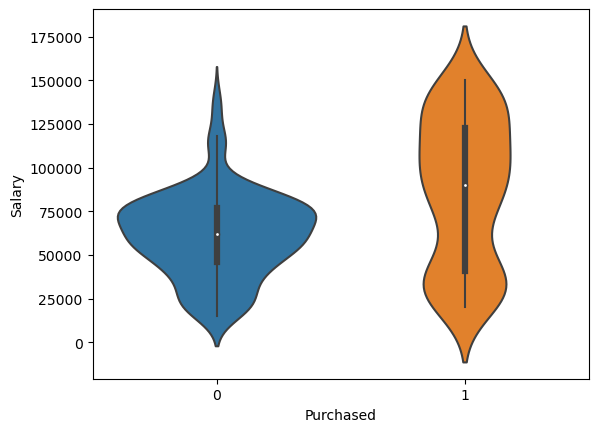

In [8]:
sns.violinplot(x="Purchased", y="Salary", data=data)
plt.show()

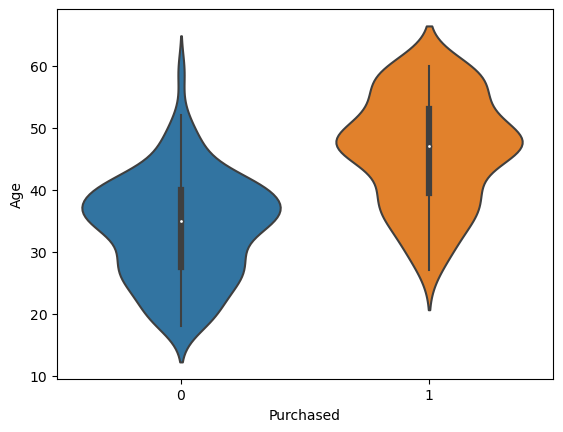

In [9]:
sns.violinplot(x="Purchased", y="Age", data=data)
plt.show()

On fait un heat map pour voir la corrélation des variables entres elles

In [10]:
data.corr()

,Age,Salary,Purchased
Age,1.000000,0.100919,0.594989
Salary,0.100919,1.000000,0.344852
Purchased,0.594989,0.344852,1.000000


À ce point là, il semblerait que l'age est la variable qui agit le plus sur l'acquisition d'un bien immobilier, plus que le salaire 

In [11]:
# Standardiser les données 
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data = pd.DataFrame(data_std, columns=data.columns)
print(data)


# Normalisation des données 
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(data)
data= pd.DataFrame(df_normalized, columns=data.columns)
print(data)


          Age    Salary  Purchased
0   -1.945417 -1.519232  -0.874475
1   -0.411625 -1.490787  -0.874475
2   -1.274383 -0.836547  -0.874475
3   -1.178521 -0.438315  -0.874475
4   -1.945417  0.102144  -0.874475
..        ...       ...        ...
325  0.642856 -0.893438   1.143544
326  1.122166 -1.405451   1.143544
327  1.026304 -1.490787   1.143544
328 -0.315763 -1.120999  -0.874475
329  0.930442 -1.035664   1.143544

[330 rows x 3 columns]
          Age    Salary  Purchased
0    0.023810  0.029630        0.0
1    0.404762  0.037037        0.0
2    0.190476  0.207407        0.0
3    0.214286  0.311111        0.0
4    0.023810  0.451852        0.0
..        ...       ...        ...
325  0.666667  0.192593        1.0
326  0.785714  0.059259        1.0
327  0.761905  0.037037        1.0
328  0.428571  0.133333        0.0
329  0.738095  0.155556        1.0

[330 rows x 3 columns]


On transforme la donnée purchased qui est en réalité booleenne, celà évitera à l'ordinateur de penser qu'il pourrait y avoir une autre valeur possible et se limiter à 0 pour pas encore acheté ou 1 pour acheté 

La transformation est utile pour savoir si on a acheté la maison ou pas et garder cette binarité même après la standardisation et la normalisation des données 

In [12]:
data['Purchased'].astype(bool)

0      False
1      False
2      False
3      False
4      False
       ...  
325     True
326     True
327     True
328    False
329     True
Name: Purchased, Length: 330, dtype: bool

## Diviser le dataset en train et test

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=5)
print('tran set',X_train.shape)
print('tran test',X_test.shape)

tran set (231, 2)
tran test (99, 2)


Observer les deux datasets train et test

Text(0.5, 1.0, 'Test set')

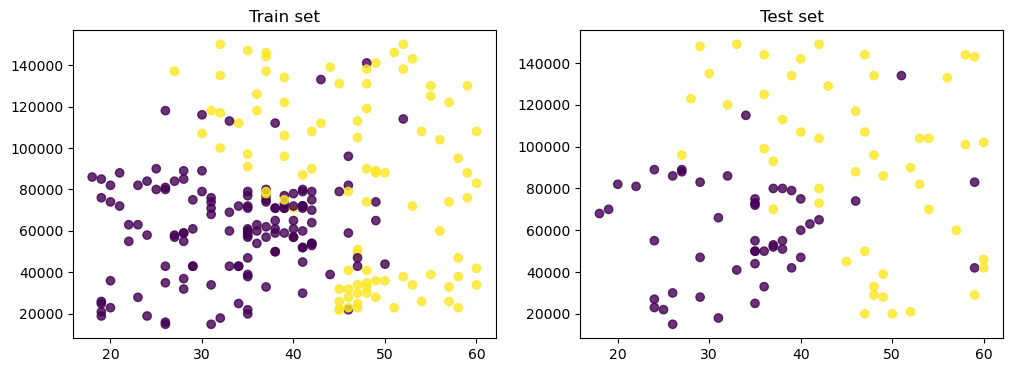

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], c=y_train,alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], c=y_test,alpha=0.8)
plt.title('Test set')

## Implémentation du modele KNN

Définir le  model KNN avec par défault un voisin

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

Entrainement du modele sur les données 

In [30]:
model.fit(X_train,y_train)
print("train score",model.score(X_train,y_train))
print("test score",model.score(X_test,y_test)) #précision attention la précision n'est pas l'accuracy 

train score 1.0
test score 0.7474747474747475


Utilisation du modele pour prédir si une personne de 24 ans qui gagne 50000 euros peut acheter ou non une maison 

In [31]:
def purchase(model,Age,Salary):
    x = np.array([Age,Salary]).reshape(1,2)
    print(model.predict(x))
purchase(model,Age=24,Salary=100000) # appel: Age: 24 salaire 100000

[1]


c:\Users\rymkm\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Choisir les meilleurs hyperparametres

1


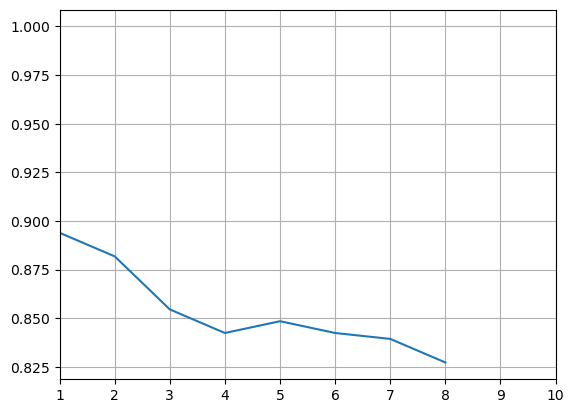

In [32]:
score =[]
best_k = 1
best_score = 0

for k in range(best_k,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x,y)
    score.append(model.score(x,y))
    if best_score < model.score(x,y):
        best_k = k
        best_score = model.score(x,y)
print(best_k)
plt.xlim(1,10)
plt.grid()
plt.plot(score)

On remarque que 1 Nighbor sont suffisants pour faire un model optimal 

## On peut utiliser le cross validation 

In [33]:
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier()
cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')#cv c'est en combiens de partie on divise le data set#cv c'est en combiens de partie on divise le data set

array([0.78723404, 0.73913043, 0.82608696, 0.7826087 , 0.73913043])

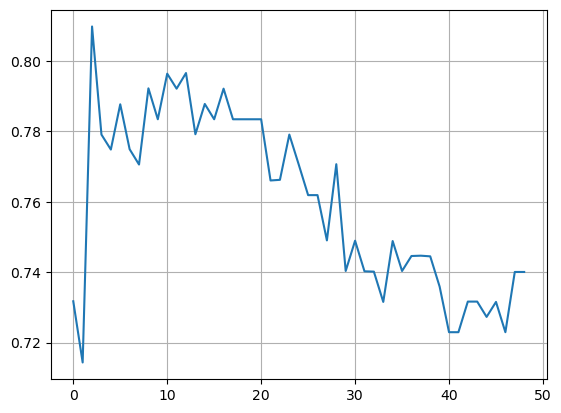

In [34]:
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k),X_train,y_train,cv=5).mean()
    val_score.append(score)
plt.plot(val_score)
plt.grid()

La validation curve 

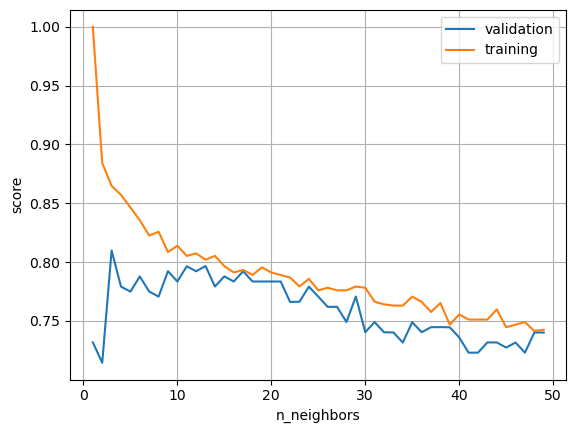

In [35]:
from sklearn.model_selection import validation_curve

k = np.arange(1, 50) 
param_name = 'n_neighbors'  # Le nom du paramètre que vous souhaitez ajuster
train_score, val_score = validation_curve(model, X_train, y_train, param_name=param_name, param_range=k, cv=5) 

plt.plot(k, val_score.mean(axis=1), label='validation') 
plt.plot(k, train_score.mean(axis=1), label='training') 
plt.ylabel('score') 
plt.xlabel('n_neighbors') 
plt.legend()
plt.grid()
plt.show()

La grid search

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,20),'metric':['euclidian','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8098057354301573
{'metric': 'manhattan', 'n_neighbors': 3}


c:\Users\rymkm\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
95 fits failed out of a total of 190.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rymkm\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rymkm\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\rymkm\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\rymkm\anaconda3\Lib\site-packages

Courbe d'apprentissage

[ 18  36  55  73  92 110 128 147 165 184]


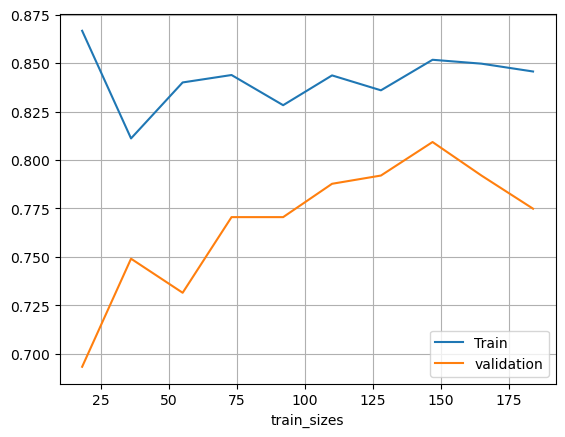

In [37]:
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(model, X_train,y_train,train_sizes=np.linspace(0.1,1,10),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='Train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.grid()
plt.legend()